In [4]:
# importing all libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# Reading data from link
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data imported successfully")
data.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


from matplotlib import pyplot as plt
_df_0['Hours'].plot(kind='hist', bins=20, title='Hours')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Scores'].plot(kind='hist', bins=20, title='Scores')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='Hours', y='Scores', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Hours'].plot(kind='line', figsize=(8, 4), title='Hours')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_4['Scores'].plot(kind='line', figsize=(8, 4), title='Scores')
plt.gca().spines[['top', 'right']].set_visible(False)

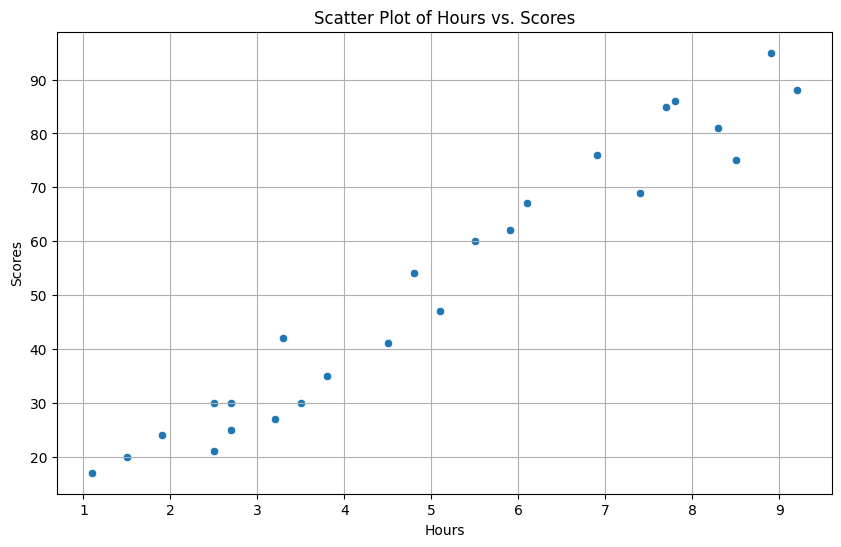

In [14]:
# Creating a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Hours', y='Scores', data=data)
plt.title('Scatter Plot of Hours vs. Scores')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.grid(True)
plt.show()

## **Preparing the data**

In [8]:
# Splitting the data into train and test sets
train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)
test_set.head()

,Hours,Scores
8,8.3,81
16,2.5,30
0,2.5,21
23,6.9,76
11,5.9,62


In [21]:
# Separating the independent and dependent variables
X_train = train_set[['Hours']]
y_train = train_set['Scores']
X_test = test_set[['Hours']]
y_test = test_set['Scores']

# **Training the model**

**Linear Regression**

In [22]:
# Creating a linear regression model
linear_model = LinearRegression()

# Training the model
linear_model.fit(X_train, y_train)

# Predicting the scores for the test set
y_pred = linear_model.predict(X_test)

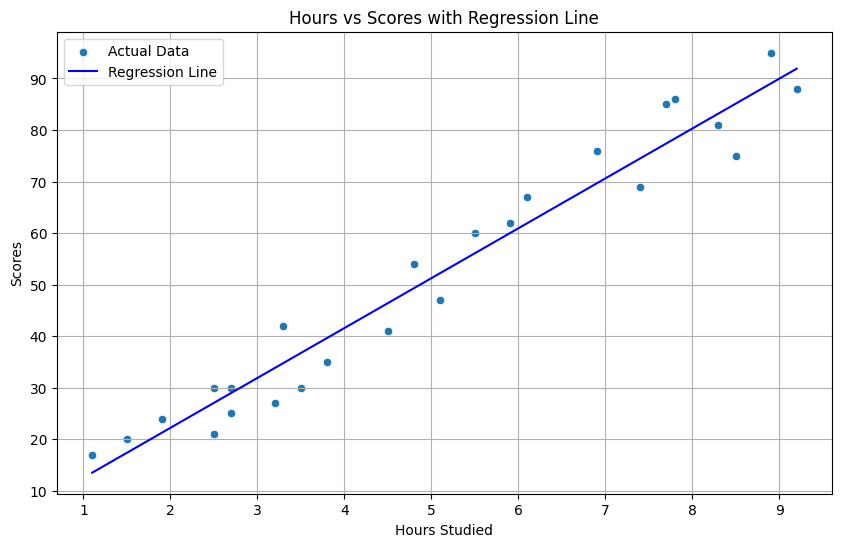

 **Other Regression models: Ridge, Lasso, Elastic**

In [17]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

# Creating Ridge, Lasso, and Elastic Net regression models
ridge_model = Ridge(random_state=42)
lasso_model = Lasso(random_state=42)
elastic_net_model = ElasticNet(random_state=42)

# Training the models
ridge_model.fit(X_train, y_train)
lasso_model.fit(X_train, y_train)
elastic_net_model.fit(X_train, y_train)

Exploring Mean Absolute Error of Other Regression models:
Ridge: 19.421300340741833
Lasso: 20.01271067839168
Elastic: 27.013035398378868


## **Making Prediction**

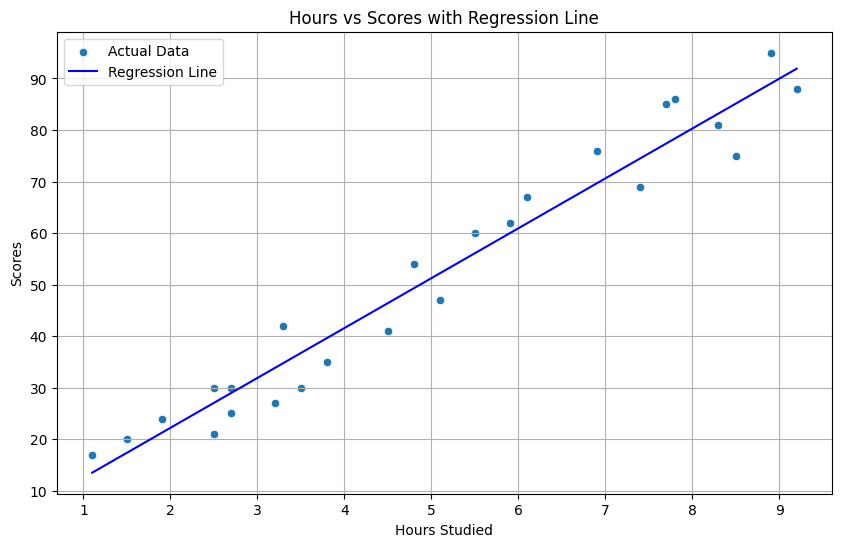

In [24]:
# Plotting the regression line on the scatter plot
plt.figure(figsize=(10, 6))

# Scatter plot of the original data
sns.scatterplot(x='Hours', y='Scores', data=data, label='Actual Data')

# Plotting the regression line
# Generating a range of values from min to max hours
hours_range = pd.DataFrame({'Hours': [data['Hours'].min(), data['Hours'].max()]})
# Predicting the scores for these values
predicted_scores = linear_model.predict(hours_range)
# Plotting the line
sns.lineplot(x=hours_range['Hours'], y=predicted_scores, color='blue', label='Regression Line')

plt.title('Hours vs Scores with Regression Line')
plt.xlabel('Hours Studied')
plt.ylabel('Scores')
plt.legend()
plt.grid(True)
plt.show()

In [25]:
# Predicting other models on the test set
y_pred_ridge = ridge_model.predict(X_test)
y_pred_lasso = lasso_model.predict(X_test)
y_pred_elastic_net = elastic_net_model.predict(X_test)

In [31]:
# Predicting the score for 9.5 hours of study
hours = [[9.5]]
linear_score = linear_model.predict(hours)
linear_score = linear_model.predict(hours)
linear_score = linear_model.predict(hours)
linear_score = linear_model.predict(hours)
print("For styding 9.5 hrs per day, predicted score:", linear_score[0])

For styding 9.5 hrs per day, predicted score: 94.80663482122885


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [32]:
# Adding the predicted scores from the linear model to the test set for comparison
test_set_with_predictions = test_set.copy()
test_set_with_predictions['Predicted_Score_Linear'] = model.predict(X_test)
test_set_with_predictions['Predicted_Score_Ridge'] = ridge_model.predict(X_test)
test_set_with_predictions['Predicted_Score_Lasso'] = lasso_model.predict(X_test)
test_set_with_predictions['Predicted_Score_ElasticNet'] = elastic_net_model.predict(X_test)

test_set_with_predictions.sort_index()

,Hours,Scores,Predicted_Score_Linear,Predicted_Score_Ridge,Predicted_Score_Lasso,Predicted_Score_ElasticNet
0,2.5,21,27.032088,27.220837,27.425097,28.975893
8,8.3,81,83.188141,82.931871,82.654544,80.548991
11,5.9,62,59.951153,59.879030,59.800979,59.208399
16,2.5,30,27.032088,27.220837,27.425097,28.975893
23,6.9,76,69.633232,69.484380,69.323298,68.100312


# **Model Evaluation**

In [27]:
# Calculating Mean Absolute Error for each model
mae_linear = mean_squared_error(y_test, y_pred)
mae_ridge = mean_squared_error(y_test, y_pred_ridge)
mae_lasso = mean_squared_error(y_test, y_pred_lasso)
mae_elastic_net = mean_squared_error(y_test, y_pred_elastic_net)
print("Exploring Mean Absolute Error of Other Regression models:")
print("Linear: ",mae_linear)
print("Ridge:", mae_ridge)
print("Lasso:", mae_lasso)
print("Elastic:", mae_elastic_net)

Exploring Mean Absolute Error of Other Regression models:
Linear:  18.943211722315272
Ridge: 19.421300340741833
Lasso: 20.01271067839168
Elastic: 27.013035398378868
